In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
housing_data = pd.read_csv(url)

In [3]:
# Display the first few rows of the dataset to understand its structure
print(housing_data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [8]:
# Summary statistics of the dataset
print(housing_data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [11]:
# Print the column names of the dataset
print(housing_data.columns)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


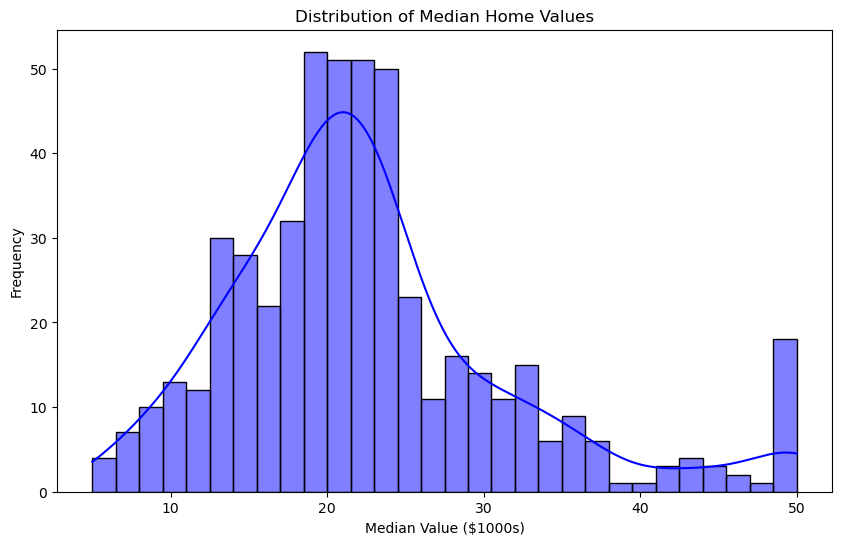

In [12]:
# Visualizing the distribution of target variable (MEDV - Median value of owner-occupied homes)
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['medv'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median Home Values')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')
plt.show()


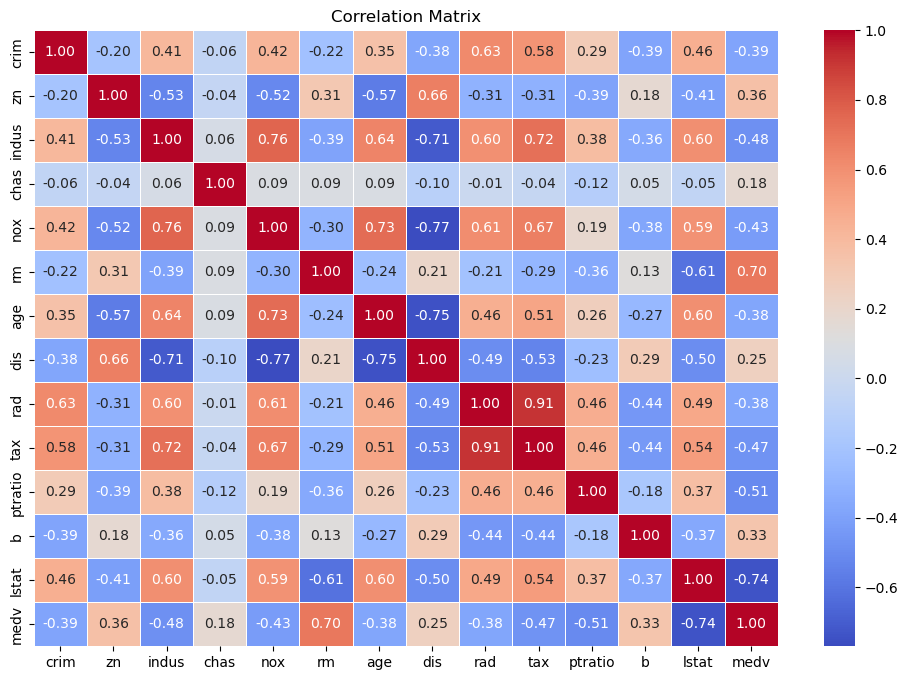

In [13]:
# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
from scipy import stats

# Filter data for houses bounded and not bounded by Charles river
bounded = housing_data[housing_data['chas'] == 1]['medv']
not_bounded = housing_data[housing_data['chas'] == 0]['medv']

# Perform t-test
t_stat, p_value = stats.ttest_ind(bounded, not_bounded)

# Print results
print("T-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by it.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by it.")


T-test Results:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Conclusion: Reject null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by it.


In [15]:
# Perform ANOVA
from scipy.stats import f_oneway

# Group data by AGE and get MEDV for each group
age_groups = [group['medv'] for name, group in housing_data.groupby('age')]

# Perform ANOVA
f_stat, p_value = f_oneway(*age_groups)

# Print results
print("\nANOVA Results:")
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")



ANOVA Results:
F-statistic: 0.9840091646131598
P-value: 0.5539698276810188
Conclusion: Fail to reject null hypothesis. There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [16]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(housing_data['nox'], housing_data['indus'])

# Print results
print("\nPearson Correlation Results:")
print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Interpretation
if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")



Pearson Correlation Results:
Correlation coefficient: 0.7636514469209149
P-value: 7.913361061240043e-98
Conclusion: Reject null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [18]:
# Perform multiple linear regression
from sklearn.linear_model import LinearRegression

X = housing_data[['dis']]  # Independent variable
y = housing_data['medv']   # Dependent variable

# Fit the model
model = LinearRegression().fit(X, y)

# Get coefficients
coeff = model.coef_

# Print results
print("\nRegression Analysis Results:")
print("Coefficient of DIS (impact on medv):", coeff)

# Interpretation
if p_value < alpha:
    print("Conclusion: Reject null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")
else:
    print("Conclusion: Fail to reject null hypothesis. There is no impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.")



Regression Analysis Results:
Coefficient of DIS (impact on medv): [1.09161302]
Conclusion: Reject null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes.
